# Stepwise regression

A common problem encountered in regression analysis is the following:


The sweep operator is a beautiful tool for this kind of question, because **including/excluding a variable does not require re-fitting the entire model**. Instead, just *sweep* the variable in if you want to include its effect, and if it isn't good, *sweep* it out!

In [1]:
import sweepystats as sw
import numpy as np

Lets simulate some data. I simulated $p=10$ covariates from

$$\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + N(0, \mathbf{I})$$

but only $k=3$ randomly chosen variables influence the response. 

In [2]:
n, p, k = 20, 5, 3 # number of samples, covariates, causal covariates
np.random.seed(123) # for reproducibility
X = np.random.normal(n, p, size=(n, p))
beta = np.zeros(p)
beta[np.random.choice(np.arange(p), size=k, replace=False)] = np.random.randn(k)
y = X @ beta + np.random.normal()

Form an instance of `LinearRegression` class:

In [3]:
ols = sw.LinearRegression(X, y)

### Including/excluding covariates corresponds to sweeping the variable in/out

For example, lets "sweep in" the first variable.

In [4]:
ols.include_k(0) # include the first variable in regression

After sweeping in the first variable, we can examine the sum-of-squares residuals:

In [5]:
ols.resid()

np.float64(1394.3565581860448)

Lets try sweeping in variables one at a time (i.e. including more and more variables in multiple regression) and examine the resulting sum of squares residual $\|\mathbf{y} - \hat{\mathbf{y}}\|^2$

In [6]:
resids = [ols.resid()]
for i in range(1, p):
    ols.include_k(i) # sweep the ith variable in (include it in regression)
    resids.append(ols.resid()) # save sum-of-square residual

We can visualize the residuals

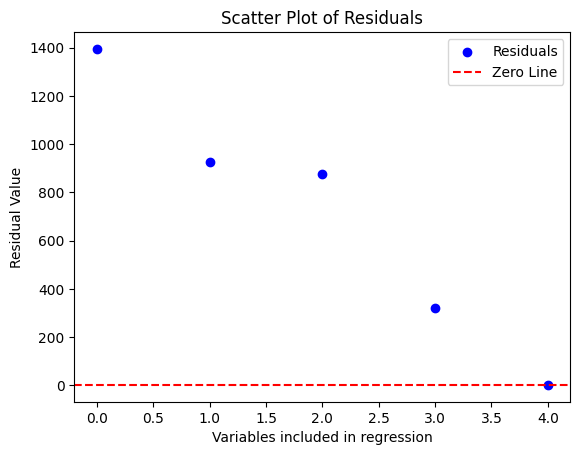

In [7]:
import matplotlib.pyplot as plt
plt.scatter(range(p), resids, color='blue', label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')
plt.xlabel('Variables included in regression')
plt.ylabel('Residual Value')
plt.title('Scatter Plot of Residuals')
plt.legend()
plt.show()

So it seems adding the 2nd, 4th, and 5th variable improved model fit significantly (by reducing sum-of-squared residual). How do we statistically determine whether they are redundant? We can test the hypothesis $H_k = 0$ using an F-test:

In [8]:
# test whether kth variable is significant
for k in range(p):
    f_stat, pval = ols.f_test(k)
    print(f"Variable {k} has p-value {pval}")

Variable 0 has p-value 9.062122146792274e-24
Variable 1 has p-value 0.4648260563197989
Variable 2 has p-value 0.19236569475852966
Variable 3 has p-value 1.5600761098077415e-16
Variable 4 has p-value 7.343646064572416e-18


So the 1st, 4th, and 5th variable is significant. We can compare this against the true beta coefficient:

In [9]:
beta

array([-1.97788793,  0.        ,  0.        ,  0.64205469,  0.71226464])

So in this simple example, stepwise regression using F-test worked in identifying the correct model, while visually examining the improvement in residual error was not completely correct! 